In [2]:
import numpy as np;
import pandas as pd;

import matplotlib.pyplot as plt;
import seaborn as sns;

In [3]:
comments = pd.read_csv("./GBcomments.csv", error_bad_lines=False);

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


# SENTIMENT ANALYSIS ON DATA

In [4]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

In [5]:
#!pip install textblob

In [6]:
from textblob  import TextBlob;

In [7]:
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment.polarity

0.45000000000000007

In [8]:
#Checking for Nan values
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [9]:
comments.dropna(inplace=True);

In [10]:
#Check the Nan
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [11]:
polarity = []
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [12]:
comments['polarity'] = polarity;

In [13]:
comments_positive = comments.loc[comments.polarity == 1];
comments_positive.shape

(20400, 5)

## EDA on positive sentiments

In [74]:
from wordcloud import WordCloud, STOPWORDS

In [75]:
stopwords = set(STOPWORDS);

In [76]:
total_comments = " ".join(comments_positive['comment_text']);

In [77]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments);

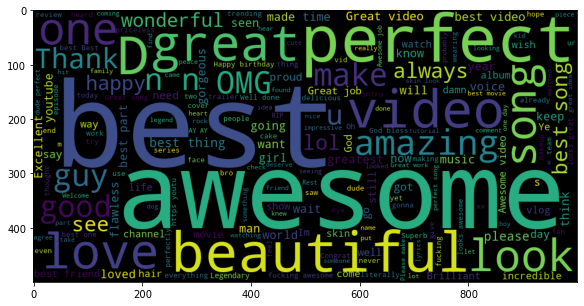

In [78]:
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud)

## EDA on negative sentiments

In [79]:
comments_negative = comments.loc[comments['polarity'] <= 0];

In [80]:
total_comments_negative = " ".join(comments_negative["comment_text"]);

In [82]:
wordcloud_negative = WordCloud(width=1000, height=500, stopwords=STOPWORDS).generate(total_comments_negative);

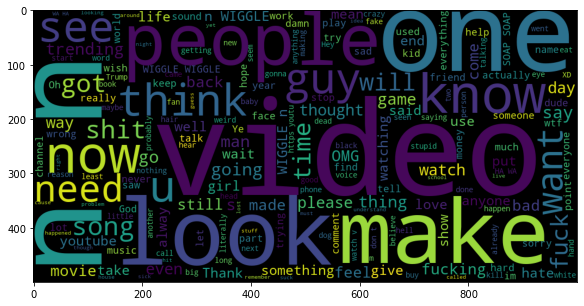

In [69]:
plt.figure(figsize=(15, 5));
plt.imshow(wordcloud_negative)

# Analysing tags

<h3 style="background-color: red; padding: 5px 8px;">What is the most trending tags on youtube ?</h3>

In [6]:
videos = pd.read_csv("./USvideos.csv", error_bad_lines=False);

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [7]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [8]:
tags_complete = " ".join(videos['tags']);

In [9]:
import re

In [10]:
tags = re.sub('[^a-zA-Z]', ' ', tags_complete);

In [11]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [110]:
tags = re.sub(' +', ' ', tags);

In [111]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

In [112]:
wordcloud_tags = WordCloud(width=1000, height=500, stopwords=STOPWORDS).generate(tags)

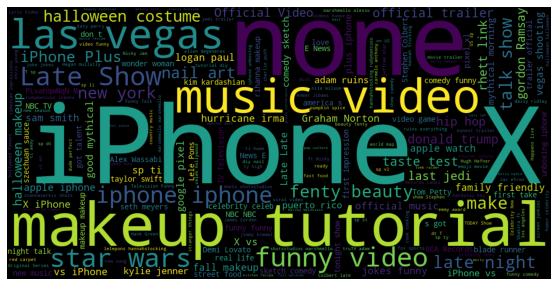

In [113]:
plt.figure(figsize = (12, 5));
plt.imshow(wordcloud_tags);
plt.axis('off');

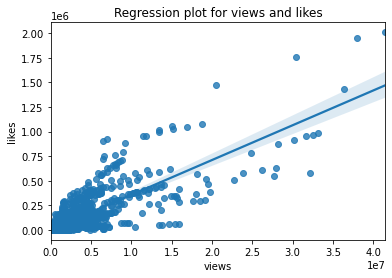

In [119]:
sns.regplot(data=videos, x='views', y='likes'); # Independent variable then dependent variable
plt.title('Regression plot for views and likes');

In [13]:
# Using pearson correlation
videos.loc[:, ['likes', 'views']].corr()

likes     views
likes  1.000000  0.832844
views  0.832844  1.000000

In [14]:
from scipy import stats

In [20]:
# Evaluating the significance using p-value

pearson_coef, p_value = stats.pearsonr(videos['likes'], videos['views'])
print("Pearson coeficient is: ", pearson_coef, "With a p-value: ", p_value)

Pearson coeficient is:  0.8328442631592103 With a p-value:  0.0


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between likes and videos is statistically significant, also with a string linear relationship (~0.833)</p>

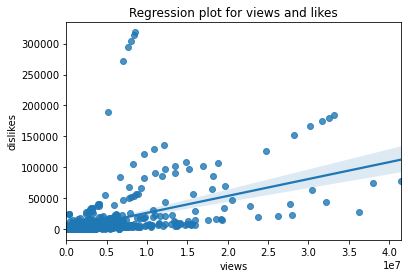

In [121]:
sns.regplot(data=viadeos, x='views', y='dislikes'); # Independent variable then dependent variable
plt.title('Regression plot for views and likes');

In [22]:
# Evaluating the significance using p-value

pearson_coef, p_value = stats.pearsonr(videos['dislikes'], videos['views'])
print("Pearson coeficient is: ", pearson_coef, "With a p-value: ", p_value)

Pearson coeficient is:  0.5419550396950306 With a p-value:  0.0


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between  dislikes and views is statistically significant, although the linear relationship isn't extremely strong (~0.585)</p>

In [23]:
df_corr = videos.loc[: , ['likes', 'views', 'dislikes']];

<ipython-input-24-0505c4c7b44f>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Correlation Matrix: \"Likes\", \"Views\", \"Dislikes\" .", pad=15.2, fontdict={'fontSize': 29.5});


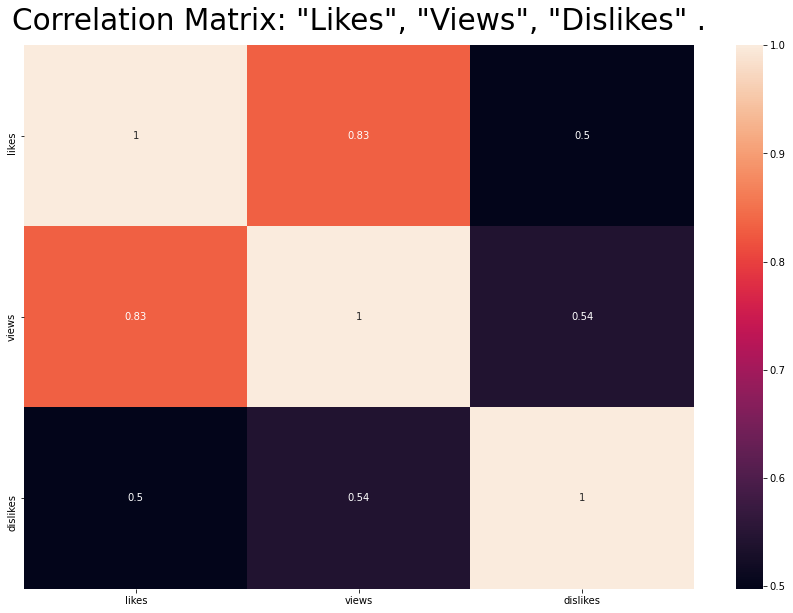

In [24]:
# cmap="YlGnBu" parameter in heatmap
plt.figure(figsize=(15, 10));
sns.heatmap(df_corr.corr(), annot=True);
plt.title("Correlation Matrix: \"Likes\", \"Views\", \"Dislikes\" .", pad=15.2, fontdict={'fontSize': 29.5});